# Lab 2
## Step 1
open the seqs1.fa file and aligned the data in the file using muscle. The output is now called seqs1.aligned.fa. Then we converted the information to newick tree (plotted below).

In [8]:

from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

tree = Phylo.read("tree.nwk","newick")
Phylo.draw_ascii(tree, file=None, column_width = 120)
a = tree.find_clades(order='preorder')
#print(a)
#print(a.id)
#print(type(tree))

 , hu.39
 |
 | rh.50
 |
 |_ rh.57
 |
 | rh.51
 |
 | rh.49
 |
_, rh.53
 |
 | rh.64
 |
 , rh.61
 |
 | __ rh.58
 ||
 ||                                                  , pi.2
 ||                 _________________________________|
 ||                |                                 , pi.3
 ||                |                                 |
 ||                |                                 | pi.1
 ||                |
 ||                |                  , rh.10
 ||             ___|                 _|
 ||            |   |                | |, bb.1
 ||            |   |                | ||
 ||            |   |    ____________|  | bb.2
 ||            |   |   |            |
 ||            |   |   |            | ___ hu.17
 ||            |   |   |            ||
 ||            |   |___|             | hu.6
 ||            |       |
 ||            |       |      ___________ rh.2
 ||            |       |     |
 ||            |       |_____|               _____ rh.40
 ||            |            

## Step 2
Here we take the information in seqs1.fa and print the sequence of each chosen specimen to screen. For this part, we tested pi.1, pi.2, rh.10, hu.6, rh.2, hu.42, cy.4, cy.6, rh.55, rh.43, rh.52. The most common species matches for chosen clusters are Adeno-associated VP1 (cap gene) virus. There are some outliers with cy.4 and 6 being the Adeno-associated virus in non-human primates. The data matches the same gene for most of the clusters however, some of the clusters are the same gene but in different species. We might not trust the annotations for sequences that come up in BLAST because the results that come in may not be from trusted sources and we don't know the quality of the sequencing reads.

In [10]:
record = SeqIO.index("seqs.fa", "fasta")
print(record.get_raw("pi.1").decode())
print(record.get_raw("pi.2").decode())
print(record.get_raw("rh.10").decode())
print(record.get_raw("hu.6").decode())
print(record.get_raw("rh.2").decode())
print(record.get_raw("hu.42").decode())
print(record.get_raw("cy.4").decode())
print(record.get_raw("cy.6").decode())
print(record.get_raw("rh.55").decode())
print(record.get_raw("rh.43").decode())
print(record.get_raw("rh.52").decode())


>pi.1
atggctgctgacggttatcttccagattggctcgaggacaacctctctga
gggcattcgcgagtggtgggcgctgaaacctggagccccgcaacccaaag
ccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctac
aagtacctcggacccttcaacggactcgacaagggggagcccgtcaacga
ggcggacgccgcggccctcgagcacgacaaggcctacgaccagcagctca
aagcgggtgacaatccgtacctgcggtataatcacgccgacgccgagttt
caagagcgtctgcaagaagatacgtcctttgggggcaacctcgggcgagc
agtcttccaggccaaaaagagggtactcgagcctctgggtctggttgagg
aaggcgctaagacggctcctggaaagaagcggccagtagaaccggactcc
agctcgggcatcggcaagtcaggccagcagcccgcgaaaaagagactgaa
ttttgggcagactggcgactcagagtcagtgcctgacccccaacctctct
cagaaccacccgcaggtccctctggtctgggatctggtacaatggctgct
ggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtggg
taatgtctcaggaaattggcattgcgattccacatggctgggcgaccgag
tcatcaccaccagcactcggacctgggccctccccacctacaacaaccac
ctctacaagcaaatctccaacgggacctcgggaggcagcagcaacgacaa
cacctactttggctacagcaccccctgggggtattttgactttaacagat
tccactgccacttttcaccacgtgactggcagcgactcatcaacaacaac
tgggggttccggcccaagaagctcaacttcaagctcttcaacatccaggt
caaggaggtcacccagaatgaaggc

## Step 3
Here we create clusters based off of the newick tree above. Using those clusters, we calcualte


In [87]:
from Bio import SeqIO
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
list_seqrecord1 = []
list_seqrecord2 = []
list_seqrecord3 = []
list_seqrecord4 = []
list_seqrecord5 = []
list_seqrecord6 = []
list_seqrecord7 = []
clust1 = ["hu.39","rh.50","rh.57","rh.51","rh.49", "rh.53","rh.64", "rh.61"]
clust2 = ["pi.2", "pi.3","pi.1"]
clust3 = ["rh.10", "bb.1","bb.2", "hu.17","hu.6", "rh.2"]
clust4 = ["rh.40", "hu.67", "hu.37", "hu.40", "hu.66", "hu.41", "rh.38", "hu.42"]
clust5 = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13"]
clust6 = ["rh.35", "rh.36", "rh.37", "cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "hu.43", "hu.48"]
clust7 = ["hu.44", "hu.46", "hu.14", "hu.31", "hu.32", "rh.43", "rh.52"]    
#Putting the seqRecord objects corresponding to the clusters into a list
for i in clust1:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord1.append(seq_rec)
for i in clust2:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord2.append(seq_rec)
for i in clust3:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord3.append(seq_rec)
for i in clust4:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord4.append(seq_rec)
for i in clust5:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord5.append(seq_rec)
for i in clust6:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord6.append(seq_rec)
for i in clust7:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord7.append(seq_rec)
#Multiple Sequence Alignments created for each cluster
align1 = MultipleSeqAlignment([list_seqrecord1[0], list_seqrecord1[1], list_seqrecord1[2], list_seqrecord1[3],
                              list_seqrecord1[4],list_seqrecord1[5],list_seqrecord1[6],list_seqrecord1[7]])
align2 = MultipleSeqAlignment([list_seqrecord2[0], list_seqrecord2[1], list_seqrecord2[2]])
align3 = MultipleSeqAlignment([list_seqrecord3[0], list_seqrecord3[1], list_seqrecord3[2], list_seqrecord3[3],
                              list_seqrecord3[4],list_seqrecord3[5]])
align4 = MultipleSeqAlignment([list_seqrecord4[0], list_seqrecord4[1], list_seqrecord4[2], list_seqrecord4[3],
                              list_seqrecord4[4],list_seqrecord4[5],list_seqrecord4[6],list_seqrecord4[7]])
align5 = MultipleSeqAlignment([list_seqrecord5[0], list_seqrecord5[1], list_seqrecord5[2], list_seqrecord5[3],
                              list_seqrecord5[4]])
align6 = MultipleSeqAlignment([list_seqrecord6[0], list_seqrecord6[1], list_seqrecord6[2], list_seqrecord6[3],
                              list_seqrecord6[4],list_seqrecord6[5],list_seqrecord6[6],list_seqrecord6[7],
                              list_seqrecord6[8], list_seqrecord6[9]])
align7 = MultipleSeqAlignment([list_seqrecord7[0], list_seqrecord7[1], list_seqrecord7[2], list_seqrecord7[3],
                               list_seqrecord7[4],list_seqrecord7[5],list_seqrecord7[6]])

Text(0.5,1,'Cluster 1')

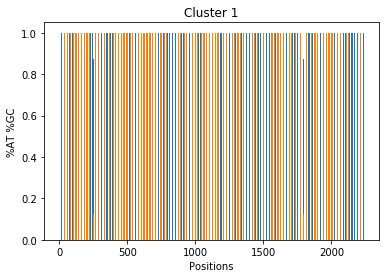

In [86]:
#Making bargraphs, based on BLAST alignment can assume that other clusters will look the same.
clust1max = align1.get_alignment_length()
clust2max = align2.get_alignment_length()
clust3max = align3.get_alignment_length()
clust4max = align4.get_alignment_length()
clust5max = align5.get_alignment_length()
clust6max = align6.get_alignment_length()
clust7max = align7.get_alignment_length()
#Cluster1
atNumList = []
for i in range(clust1max):
    position = []
    for seq_rec in align1:
        position.append(seq_rec[i])
        atNum = (position.count("A") + position.count("T"))
    atNumList.append(atNum)
alLength = len(align1)
atPctList = []
gcPctList = []
for num in atNumList:
    atPctList.append(num/alLength)
    gcPctList.append(1- (num/alLength))
p1 = plt.bar(range(len(atPctList)), atPctList, 0.5)
p2 = plt.bar(range(len(gcPctList)), gcPctList, 0.5)
plt.ylabel("%AT %GC")
plt.xlabel("Positions")
plt.title("Cluster 1")


{'whiskers': [<matplotlib.lines.Line2D at 0x1373315f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1372465f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x137312b00>],
 'medians': [<matplotlib.lines.Line2D at 0x1380653c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1380c8b38>],
 'means': []}

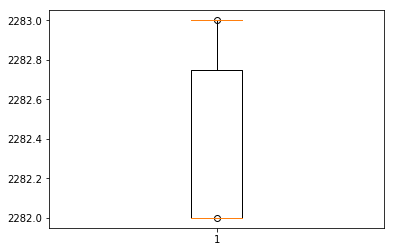

In [93]:
#Making a boxplot for the lengths of sequences in each cluster, again all are same length
record = SeqIO.index("seqs.aligned.fa", "fasta")
#Cluster1
lenList1 = []
for plc in clust1:
    lenList1.append(len(record.get_raw(plc).decode()))
#Cluster2
lenList2 = []
for plc in clust2:
    lenList2.append(len(record.get_raw(plc).decode()))
#Cluster3
lenList3 = []
for plc in clust3:
    lenList3.append(len(record.get_raw(plc).decode()))
#Cluster4
lenList4 = []
for plc in clust4:
    lenList4.append(len(record.get_raw(plc).decode()))
#Cluster5
lenList5 = []
for plc in clust5:
    lenList5.append(len(record.get_raw(plc).decode()))
#Cluster6
lenList6 = []
for plc in clust6:
    lenList6.append(len(record.get_raw(plc).decode()))
#Cluster7
lenList7 = []
for plc in clust1:
    lenList7.append(len(record.get_raw(plc).decode()))
plt.boxplot(lenList1)
plt.boxplot(lenList2)
plt.boxplot(lenList3)
plt.boxplot(lenList4)
plt.boxplot(lenList5)
plt.boxplot(lenList6)
plt.boxplot(lenList7)
